In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
training_dir = "dataset/Training"
validation_dir = "dataset/Validation"
input_shape = (224,224,3)

In [26]:
training_data_generator = ImageDataGenerator(
                                             rescale = 1./255,
                                             horizontal_flip = True,
                                             vertical_flip = True,
                                             rotation_range = 45,
                                             height_shift_range = 0.2,
                                             width_shift_range = 0.2,
                                             fill_mode = "nearest"
                                             )

validation_data_generator = ImageDataGenerator(
                                               rescale = 1./255,
                                               )

train_generator = training_data_generator.flow_from_directory(
    training_dir,
    target_size =(224,224),
    class_mode = "categorical",
    batch_size = 64
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size =(224,224),
    class_mode = "categorical",
    batch_size = 16
)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [27]:
import keras
from keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from tf.keras.optimizers import Adam

def fireNet(input_shape):
    model = keras.models.Sequential([
                                     layers.Conv2D(96, (11,11), strides=(4,4), activation="relu", input_shape=input_shape),
                                     layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

                                     layers.Conv2D(256, (5,5), activation="relu", input_shape=input_shape),
                                     layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

                                     layers.Conv2D(512, (5,5), activation="relu",),
                                     layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

                                     layers.Flatten(),
                                     layers.Dropout(0.3),

                                     layers.Dense(2048, activation="relu"),
                                     layers.Dropout(0.3),

                                     layers.Dense(1024, activation="relu"),
                                     layers.Dropout(0.3),

                                     layers.Dense(2, activation="softmax")
                                     ])
    
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = Adam(learning_rate = 1e-4),
        metrics =["acc"]

    )
    return model

In [28]:
model = fireNet(input_shape)
model.summary()

/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 22, 22, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 512)      │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,223,490 (39.00 MB)

 Trainable params: 10,223,490 (39.00 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch= 15,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=15,
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9620 - loss: 0.1196 - val_acc: 0.9540 - val_loss: 0.1545
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - acc: 0.9531 - loss: 0.1411 
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - acc: 0.9470 - loss: 0.1576 - val_acc: 0.9456 - val_loss: 0.1679
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - acc: 0.9844 - loss: 0.0711 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9591 - loss: 0.1305 - val_acc: 0.9247 - val_loss: 0.1883
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - acc: 0.9375 - loss: 0.1583 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - acc: 0.9449 - loss: 0.1596 - val_acc: 0.9414 - val_loss: 0.1747
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - acc: 0.9000 - loss: 0.3381
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - acc: 0.9543 - loss: 0.1238 - val_acc: 0.9582 - val_loss: 0.1599
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - acc: 0.9688 - loss: 0.1057 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - acc: 0.9603 - loss: 0.1186 - val_acc: 0.9498 - val_loss: 0.1603
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9375 - loss: 0.1229   
Epoch 13/1

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (50,) and (25,)

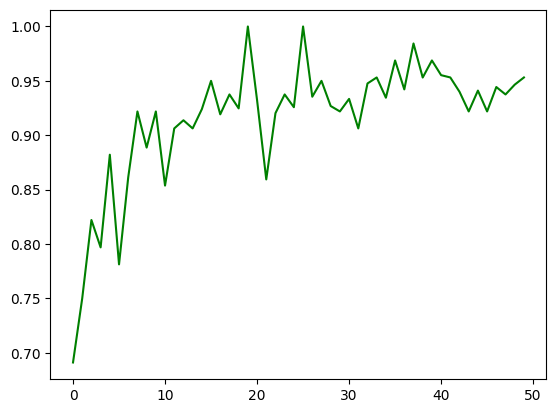

In [36]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(0,50)

plt.plot(epochs, acc, "g",label="Training Accuracy")
plt.plot(epochs, val_acc, "black",label="Validation Accuracy")
plt.title("Traning|Validation Accuracy")
plt.legend(loc ="0")
plt.figure()
plt.show()

plt.plot(epochs, loss, "r",label="Training Loss")
plt.plot(epochs, val_loss, "blue",label="Validation Loss")
plt.title("Traning|Validation Loss")
plt.legend(loc ="0")

plt.figure()
plt.show()